#### Problem 12

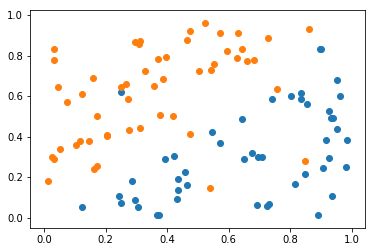

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#读取数据
train = np.genfromtxt('hw2_adaboost_train.dat')
test = np.genfromtxt('hw2_adaboost_test.dat')
#作图
plt.scatter(train[:, 0][train[:, 2] == 1], train[:, 1][train[:, 2] == 1])
plt.scatter(train[:, 0][train[:, 2] == -1], train[:, 1][train[:, 2] == -1])
plt.show()

In [8]:
#按第一个下标排序
train1 = np.array(sorted(train, key=lambda x:x[0]))

#按第二个下标排序
train2 = np.array(sorted(train, key=lambda x:x[1]))

#获得theta
x1 = train1[:, 0]
theta1 = np.append(np.array(x1[0] - 0.1), (x1[:-1] + x1[1:])/2)
theta1 = np.append(theta1, x1[-1] + 0.1)

x2 = train1[:, 1]
theta2 = np.append(np.array(x2[0]-0.1), (x2[:-1] + x2[1:])/2)
theta2 = np.append(theta2, x2[-1]+0.1)

#合并theta
theta = np.c_[theta1, theta2]

y = train[:, 2]
X = train[:, :2]

def decision_stump(X, y, U, theta):
    """
    X为训练数据，y为标签，U为权重，theta为stump
    """
    #向量化执行计算
    n = theta.shape[0]
    m = X.shape[0]
    #将X复制按横轴n份
    X = np.tile(X, (n, 1))
    #s=1
    y1 = np.sign(X - theta)
    #s=-1
    y2 = np.sign(X - theta) * (-1)
    #计算加权错误
    error1 = np.sum((y1!=y) * U, axis=1)
    error2 = np.sum((y2!=y) * U, axis=1)
    #计算最小错误对应的下标
    i1 = np.argmin(error1)
    i2 = np.argmin(error2)
    #判断哪个误差更小
    if error1[i1] < error2[i2]:
        s = 1
        index = i1
        error = error1[i1] / m
    else:
        s = -1
        index = i2
        error = error2[i2] / m
    return s, index, error

def decision_stump_all(X, y, U, theta):
    """
    对两个维度分别使用decision_stump，取误差较小的维度
    """
    #维度1
    X1 = X[:, 0]
    theta1 = theta[:, 0].reshape(-1, 1)
    s1, i1, e1 = decision_stump(X1, y, U, theta1)
    
    #维度2
    X2 = X[:, 1]
    theta2 = theta[:, 1].reshape(-1, 1)
    s2, i2, e2 = decision_stump(X2, y, U, theta2)
    
    if(e1 < e2):
        return e1, s1, 0, i1
    else:
        return e2, s2, 1, i2

def Adaptive_Boosting(X, y, theta, T=300):
    n = X.shape[0]
    u = np.ones(n) / n

    #记录需要的数据
    Alpha = np.array([])
    U = np.array([])
    Epsilon = np.array([])
    Ein = np.array([])
    G = np.array([])

    for t in range(T):
        #计算当且最优的参数
        ein, s, d, index = decision_stump_all(X, y, u, theta)
        #计算误差
        epsilon = u.dot((s * np.sign(X[:, d] - theta[:, d][index])) != y) / np.sum(u)
        #计算系数
        k = np.sqrt((1 - epsilon) / epsilon)
        #找到错误的点
        i1 = s * np.sign(X[:, d] - theta[:, d][index]) != y
        #更新权重
        u[i1] = u[i1] * k
        #找到正确的点
        i2 = s * np.sign(X[:, d] - theta[:, d][index]) == y
        #更新权重
        u[i2] = u[i2] / k
        #更新alpha
        alpha = np.log(k)
        
        #存储数据
        Ein = np.r_[Ein, ein]
        if(t == 0):
            U = np.array([u])
        else:
            U = np.r_[U, np.array([u])]
        Epsilon = np.r_[Epsilon, epsilon]
        Alpha = np.r_[Alpha, alpha]
        g = [[s, d, index]]

        if(t == 0):
            G = np.array(g)
        else:
            G = np.r_[G, np.array(g)]
    return Ein, U, Epsilon, Alpha, G

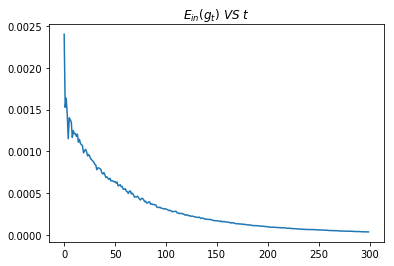

Ein(g1) = 0.0024000000000000002 ,alpha1 = 0.5763397549691927


In [9]:
#训练数据
T = 300
Ein, U, Epsilon, Alpha, G = Adaptive_Boosting(X, y, theta, T=T)

#problem 12
t = np.arange(T)

plt.plot(t, Ein)
plt.title("$E_{in}(g_t)\ VS\ t$")
plt.show()
print("Ein(g1) =", Ein[0], ",alpha1 =", Alpha[0])

#### Problem 14

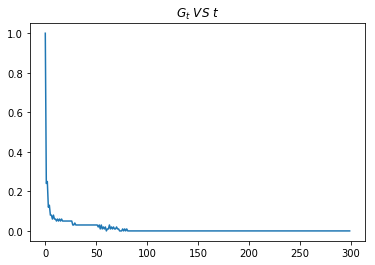

Ein(G) = 0.0


In [10]:
#problem 14
def predict(X, y, G, Alpha, t, theta):
    """
    利用前t个alpha, g计算Ein(Gt)
    """
    
    s = G[:t, 0]
    d = G[:t, 1]
    theta_ = G[:t, 2]
    alpha = Alpha[:t]

    result = []
    for i in range(t):
        s1 = s[i]
        d1 = d[i]
        t1 = theta_[i]
        result.append(s1*np.sign(X[:, d1] - theta[:, d1][t1]))
    r = alpha.dot(np.array(result))
    
    return np.mean(np.sign(r) != y)

T = 300
t = np.arange(T)
G1 = [predict(X, y, G, Alpha, i, theta) for i in t]

plt.plot(t, G1)
plt.title("$G_t\ VS\ t$")
plt.show()

print("Ein(G) =", G1[-1])

#### Problem 15

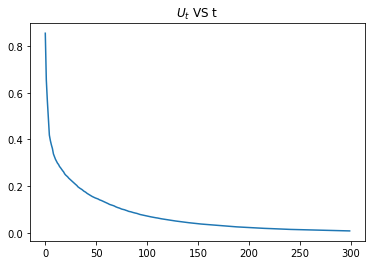

U2 = 0.6545039637744691 UT = 0.008596775074963087


In [11]:
#problem 15
U1 = U.sum(axis=1)

plt.plot(t, U1)
plt.title('$U_t$ VS t')
plt.show()

print("U2 =", U1[1], "UT =", U1[-1])

#### Problem 16

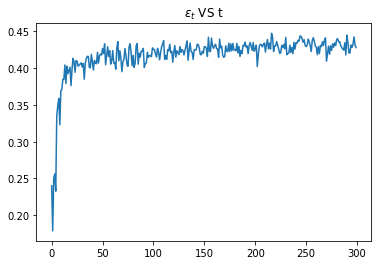

minimun epsilon = 0.1787280701754386


In [12]:
#problem 16
plt.plot(t, Epsilon)
plt.title('$\epsilon_t$ VS t')
plt.show()

print("minimun epsilon =", np.min(Epsilon))

#### Problem 17

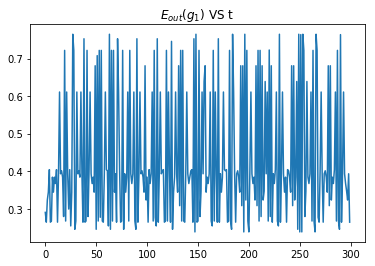

Eout(g1) = 0.29


In [13]:
#problem 17
Xtest = test[:, :2]
ytest = test[:, 2]
#获得参数
s = G[:, 0]
d = G[:, 1]
theta_ = G[:, 2]

g = []
for i in range(300):
    s1 = s[i]
    d1 = d[i]
    t1 = theta_[i]
    
    g.append(np.mean(s1*np.sign(Xtest[:, d1] - theta[:, d1][t1]) != ytest))
    
plt.plot(t, g)
plt.title('$E_{out}(g_1)$ VS t')
plt.show()

print("Eout(g1) =", g[0])

#### Problem 18

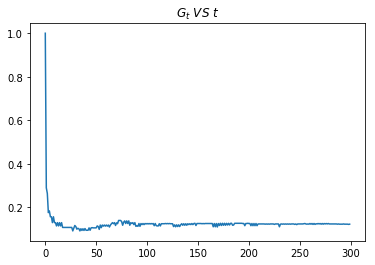

Ein(G) = 0.123


In [14]:
#problem 18
t = np.arange(T)
G2 = [predict(Xtest, ytest, G, Alpha, i, theta) for i in t]

plt.plot(t, G2)
plt.title("$G_t\ VS\ t$")
plt.show()

print("Ein(G) =", G2[-1])

#### Problem 19

In [3]:
import numpy as np
from scipy.linalg import inv

data = np.genfromtxt('hw2_lssvm_all.dat')

#获得K
def generateK(X1, X2, gamma):
    """
    返回X1，X2
    """
    d1 = np.sum(X1 ** 2, axis=1).reshape(-1, 1)
    d2 = np.sum(X2 ** 2, axis=1).reshape(1, -1)
    dist = d1 + d2 - 2 * X1.dot(X2.T)
    K = np.exp(- gamma * dist)
    
    return K

n = int(data.shape[0] * 0.8)
m = data.shape[0] - n

#划分测试集训练集
trainx = data[:n,:][:, :-1]
trainy = data[:n,:][:, -1]
testx = data[n:,:][:, :-1]
testy = data[n:,:][:, -1]

#初始化参数
Gamma = [32, 2, 0.125]
Lambda = [0.001, 1, 1000]
#记录最优解
gammatrain = Gamma[0]
lambdatrain = Lambda[0]
gammatest = Gamma[0]
lambdatest = Lambda[0]
Ein = 1
Eout = 1

for i in Gamma:
    #计算核矩阵
    K = generateK(trainx, trainx, i)
    K1 = generateK(testx, trainx, i)
    for j in Lambda:
        #计算beta
        beta = inv(np.eye(n)*j + K).dot(trainy)
        #计算预测结果
        y1 = K.dot(beta)
        y2 = K1.dot(beta)
        ein = np.mean(np.sign(y1) != trainy)
        eout = np.mean(np.sign(y2) != testy)
        #更新最优解
        if(ein < Ein):
            Ein = ein
            gammatrain = i
            lambdatrain = j
        if(eout < Eout):
            Eout = eout
            gammatest = i
            lambdatest = j

#### Problem 19
print("minimum Ein =", Ein)
print("gamma =", gammatrain)
print("lambda =", lambdatrain)

minimum Ein = 0.0
gamma = 32
lambda = 0.001


#### Problem 20

In [4]:
#### Problem 20
print("minimum Eout =", Eout)
print("gamma =", gammatest)
print("lambda =", lambdatest)

minimum Eout = 0.39
gamma = 0.125
lambda = 1000
